In [7]:
from gensim.models import LdaMulticore,TfidfModel,CoherenceModel
from gensim.corpora import Dictionary
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud
import re 
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.stem import WordNetLemmatizer

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
data = pd.read_csv('/content/drive/MyDrive/NLP Dataset/Papers.csv')
data.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [11]:
data = data[['id','title','paper_text']]
data.isnull().sum()

id            0
title         0
paper_text    0
dtype: int64

In [12]:
stuff_to_be_removed = list(stopwords.words('english')) + list(punctuation)

In [13]:
new_words = ['this','model','loss','graph']
stuff_to_be_removed.extend(new_words)

In [14]:
def preprocess(message):
    message = message.lower()
    #Remove links 
    message = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                    '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', message)
    # Remove extra spaces 
    message = re.sub(' +', ' ', message)
    # Remove mentions 
    message =re.sub("(@[A-Za-z0-9_]+)","", message)
    # Remove all non alphanumeric characters 
    message = re.sub("^[A-Za-z0-9_-]*$", "", message)
    # Remove stopwords and lemmatize
    lemmatizer = WordNetLemmatizer()
    message = ' '.join([lemmatizer.lemmatize(token) for token in message.split() if token not in stuff_to_be_removed and len(token)>=4])
    return message.split()

In [15]:
preprocessed_docs = data['paper_text'].apply(preprocess)

In [16]:
corpus = ' '.join([' '.join(item) for idx, item in preprocessed_docs.iteritems()])

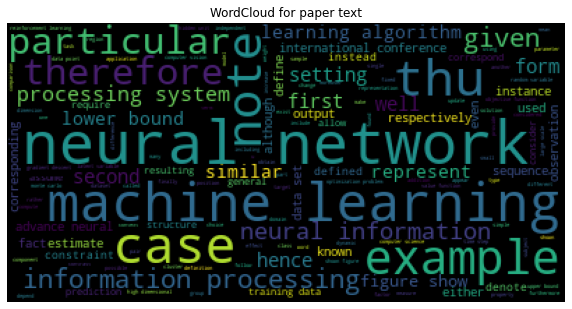

In [17]:
wordcloud = WordCloud(max_words=500,background_color='black')
wordcloud.generate(corpus)
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
ax.imshow(wordcloud)
ax.set_title('WordCloud for paper text')
plt.show()

In [18]:
dictionary = Dictionary(preprocessed_docs)

In [19]:
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_docs]

In [20]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [21]:
lda_model_tfidf = LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4,chunksize=3000)

In [22]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print(f'Topic: {idx} Word: {topic}')

Topic: 0 Word: 0.000*"kernel" + 0.000*"network" + 0.000*"image" + 0.000*"node" + 0.000*"bound" + 0.000*"training" + 0.000*"feature" + 0.000*"matrix" + 0.000*"neuron" + 0.000*"object"
Topic: 1 Word: 0.000*"neuron" + 0.000*"kernel" + 0.000*"network" + 0.000*"image" + 0.000*"cluster" + 0.000*"feature" + 0.000*"clustering" + 0.000*"matrix" + 0.000*"node" + 0.000*"layer"
Topic: 2 Word: 0.000*"regret" + 0.000*"image" + 0.000*"reward" + 0.000*"policy" + 0.000*"bound" + 0.000*"network" + 0.000*"action" + 0.000*"node" + 0.000*"tree" + 0.000*"kernel"
Topic: 3 Word: 0.000*"image" + 0.000*"kernel" + 0.000*"network" + 0.000*"neuron" + 0.000*"feature" + 0.000*"object" + 0.000*"variational" + 0.000*"spike" + 0.000*"latent" + 0.000*"training"
Topic: 4 Word: 0.000*"kernel" + 0.000*"network" + 0.000*"image" + 0.000*"node" + 0.000*"word" + 0.000*"matrix" + 0.000*"policy" + 0.000*"action" + 0.000*"bound" + 0.000*"reward"
Topic: 5 Word: 0.000*"image" + 0.000*"neuron" + 0.000*"network" + 0.000*"spike" + 0.0